<a href="https://colab.research.google.com/github/AaronReichert/build-week-2/blob/master/NZTA_Crash_Analysis_System_(CAS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders==2.*

     |████████████████████████████████| 81kB 2.2MB/s 


In [ ]:
# important imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import altair as alt

In [ ]:
file='/content/drive/My Drive/data sets/Crash_Analysis_System_CAS_data.csv'
dfcrash=pd.read_csv(file, error_bad_lines=False)
dfcrash.sample()

,X,Y,OBJECTID,advisorySpeed,animals,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashDistance,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,easting,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersectionMidblock,junctionType,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,northing,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,outdatedLocationDescription,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadCurvature,roadLane,roadMarkings,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
349314,1784471.0,5399665.0,356315,NaN,0.0,579802.0,0.0,0.0,0.0,0.0,0.0,South,2080.0,2016,CAPE PALLISER ROAD,TE WHAITI LANE,Minor Crash,No,2016,0.0,South,0.0,1784471.0,0.0,0.0,Flat,0.0,NaN,0.0,Midblock,Nil (Default),0.0,Bright sun,2273201.0,1.0,0.0,0.0,5399665.0,2.0,0.0,0.0,0.0,Current location,0.0,0.0,NaN,0.0,1.0,Wellington Region,Nil,Straight,2-way,NaN,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,Null,1.0,0.0,NaN,50.0,South Wairarapa District,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null


In [ ]:
crash_vehicle=dfcrash.fillna(0)

In [ ]:
crash_vehicle.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'animals', 'areaUnitID',
       'bicycle', 'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashDistance', 'crashFinancialYear',
       'crashLocation1', 'crashLocation2', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'easting', 'fatalCount', 'fence', 'flatHill', 'guardRail',
       'holiday', 'houseOrBuilding', 'intersectionMidblock', 'junctionType',
       'kerb', 'light', 'meshblockId', 'minorInjuryCount', 'moped',
       'motorcycle', 'northing', 'NumberOfLanes', 'objectThrownOrDropped',
       'otherObject', 'otherVehicleType', 'outdatedLocationDescription',
       'overBank', 'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole',
       'region', 'roadCharacter', 'roadCurvature', 'roadLane', 'roadMarkings',
       'roadSurface', 'roadworks', 'schoolBus', 'seriousInjuryCount',
       'slipOrFlood', 'speedLimit', 'strayAnimal', 

In [ ]:
# looking at the crash severity by vehicle type
bicycle=crash_vehicle[crash_vehicle['bicycle']>1]
crashSeverityVehicleType=pd.DataFrame(bicycle['crashSeverity'].value_counts())
crash_vehicle_types=['unknownVehicleType','bicycle','bus','carStationWagon','moped','motorcycle','otherVehicleType','parkedVehicle','pedestrian','schoolBus','suv','taxi','train','truck','crashSeverity']
for vehicle in crash_vehicle_types: 
  tempvehicle=crash_vehicle[crash_vehicle[vehicle]!=0]
  crashSeverityVehicleType[vehicle]=pd.DataFrame(tempvehicle['crashSeverity'].value_counts(normalize=True))
crashSeverityVehicleType=crashSeverityVehicleType.drop('crashSeverity',axis=1)
crashSeverityVehicleType

,unknownVehicleType,bicycle,bus,carStationWagon,moped,motorcycle,otherVehicleType,parkedVehicle,pedestrian,schoolBus,suv,taxi,train,truck
Minor Crash,0.061338,0.609776,0.196518,0.213076,0.592490,0.437595,0.205698,0.126837,0.615350,0.319149,0.244093,0.193625,0.233766,0.190930
Serious Crash,0.013011,0.161646,0.055276,0.045475,0.169084,0.272651,0.100764,0.024247,0.233368,0.106383,0.052580,0.036122,0.162338,0.059825
Non-Injury Crash,0.922862,0.218953,0.737527,0.734202,0.234651,0.255967,0.668172,0.847133,0.117001,0.550827,0.692607,0.766932,0.489177,0.727527
Fatal Crash,0.002788,0.009626,0.010678,0.007247,0.003775,0.033787,0.025365,0.001783,0.034282,0.023641,0.010720,0.003320,0.114719,0.021718


In [ ]:
crashSeverityVehicleType=crashSeverityVehicleType.sort_values(by=['bus'])

In [ ]:
crashSeverityVehicleType=crashSeverityVehicleType.T.sort_values(by=['Non-Injury Crash'], ascending=False)

In [ ]:
crashSeverityVehicleType=crashSeverityVehicleType.T

In [ ]:
crashSeverityVehicleType=crashSeverityVehicleType.reset_index()

In [ ]:
crashSeverityVehicleType['Severity']=crashSeverityVehicleType['index']

In [ ]:
crashSeverityVehicleType=crashSeverityVehicleType.drop(['index'],axis=1)

In [ ]:
crashSeverityVehicleType

,unknownVehicleType,parkedVehicle,taxi,bus,carStationWagon,truck,suv,otherVehicleType,schoolBus,train,motorcycle,moped,bicycle,pedestrian,Severity
0,0.002788,0.001783,0.003320,0.010678,0.007247,0.021718,0.010720,0.025365,0.023641,0.114719,0.033787,0.003775,0.009626,0.034282,Fatal Crash
1,0.013011,0.024247,0.036122,0.055276,0.045475,0.059825,0.052580,0.100764,0.106383,0.162338,0.272651,0.169084,0.161646,0.233368,Serious Crash
2,0.061338,0.126837,0.193625,0.196518,0.213076,0.190930,0.244093,0.205698,0.319149,0.233766,0.437595,0.592490,0.609776,0.615350,Minor Crash
3,0.922862,0.847133,0.766932,0.737527,0.734202,0.727527,0.692607,0.668172,0.550827,0.489177,0.255967,0.234651,0.218953,0.117001,Non-Injury Crash


In [ ]:
long_crash=pd.melt(crashSeverityVehicleType,id_vars=['Severity'],var_name='VehicleType', value_name='Precentage of Accidents by Severity')
long_crash.head()

,Severity,VehicleType,Precentage of Accidents by Severity
0,Fatal Crash,unknownVehicleType,0.002788
1,Serious Crash,unknownVehicleType,0.013011
2,Minor Crash,unknownVehicleType,0.061338
3,Non-Injury Crash,unknownVehicleType,0.922862
4,Fatal Crash,parkedVehicle,0.001783


In [ ]:
alt.Chart(long_crash).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='VehicleType:O',
    y=alt.Y('Precentage of Accidents by Severity:Q',sort=['Non-Injury Crash','Minor Crash','Serious Crash','Fatal Crash']),
    color=alt.Color('Severity',sort=['Non-Injury Crash','Minor Crash','Serious Crash','Fatal Crash']),
    # order=alt.Order('Severity',sort=['Non-Injury Crash','Minor Crash','Serious Crash','Fatal Crash'])
)


alt.Chart(...)

In [ ]:
alt.Chart(long_crash).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x=alt.X('VehicleType:O',sort=[]),
    y=alt.Y('Precentage of Accidents by Severity:Q',sort=['Precentage of Accidents by Severity']),
    color=alt.Color('Severity',sort=['Non-Injury Crash','Minor Crash','Serious Crash','Fatal Crash']),
    # order=alt.Order('Likelyhood',sort=['Non-Injury Crash','Minor Crash','Serious Crash','Fatal Crash'])
)


alt.Chart(...)

In [ ]:
from vega_datasets import data
data.barley().head()

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids


No handles with labels found to put in legend.


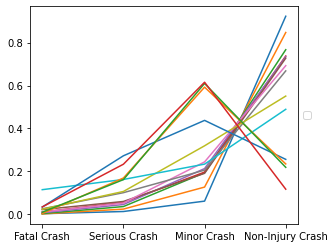

In [ ]:
# graph_labels=crashSeverityVehicleType.columns
# crashSeverityVehicleType.plot()
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(crashSeverityVehicleType)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


# fig = plt.figure()
# ax = plt.subplot(111)

# for i in xrange(5):
#     ax.plot(x, i * x, label='$y = %ix$'%i)

# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()

<Figure size 60x40 with 0 Axes>

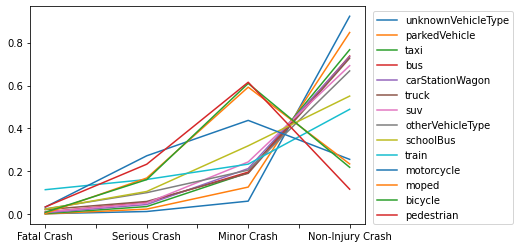

In [ ]:
fig = plt.figure(dpi=10)
crashSeverityVehicleType.plot()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [ ]:
# fig = plt.figure(dpi=10)
# ax=sns.lineplot(, data=crashSeverityVehicleType)
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

In [ ]:
crashSeverityVehicleType

,unknownVehicleType,parkedVehicle,taxi,bus,carStationWagon,truck,suv,otherVehicleType,schoolBus,train,motorcycle,moped,bicycle,pedestrian
Fatal Crash,0.002788,0.001783,0.003320,0.010678,0.007247,0.021718,0.010720,0.025365,0.023641,0.114719,0.033787,0.003775,0.009626,0.034282
Serious Crash,0.013011,0.024247,0.036122,0.055276,0.045475,0.059825,0.052580,0.100764,0.106383,0.162338,0.272651,0.169084,0.161646,0.233368
Minor Crash,0.061338,0.126837,0.193625,0.196518,0.213076,0.190930,0.244093,0.205698,0.319149,0.233766,0.437595,0.592490,0.609776,0.615350
Non-Injury Crash,0.922862,0.847133,0.766932,0.737527,0.734202,0.727527,0.692607,0.668172,0.550827,0.489177,0.255967,0.234651,0.218953,0.117001


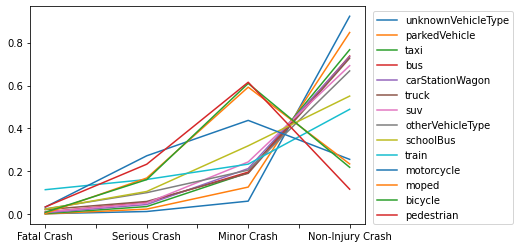

In [ ]:
%matplotlib inline
# fig1 = 
crashSeverityVehicleType.plot()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.gcf().canvas.draw()
# invFigure = plt.gcf().transFigure.inverted()
# lgd_pos = lgd.get_window_extent()
# lgd_coord = invFigure.transform(lgd_pos)
# lgd_xmax = lgd_coord[1, 0]
# ax_pos = plt.gca().get_window_extent()
# ax_coord = invFigure.transform(ax_pos)
# ax_xmax = ax_coord[1, 0]
# shift = 2 - (lgd_xmax - ax_xmax)
# plt.gcf().tight_layout(rect=(0, 0, shift, 1))
# # .figure(dpi=10)

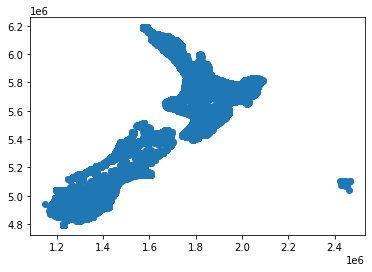

In [ ]:
plt.scatter(dfcrash['X'],dfcrash['Y'])

In [ ]:
dfcrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705824 entries, 0 to 705823
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   X                            705587 non-null  float64
 1   Y                            705587 non-null  float64
 2   OBJECTID                     705824 non-null  int64  
 3   advisorySpeed                25540 non-null   float64
 4   animals                      276105 non-null  float64
 5   areaUnitID                   705586 non-null  float64
 6   bicycle                      705819 non-null  float64
 7   bridge                       276105 non-null  float64
 8   bus                          705819 non-null  float64
 9   carStationWagon              705819 non-null  float64
 10  cliffBank                    276105 non-null  float64
 11  crashDirectionDescription    705824 non-null  object 
 12  crashDistance                451063 non-null  float64
 13 

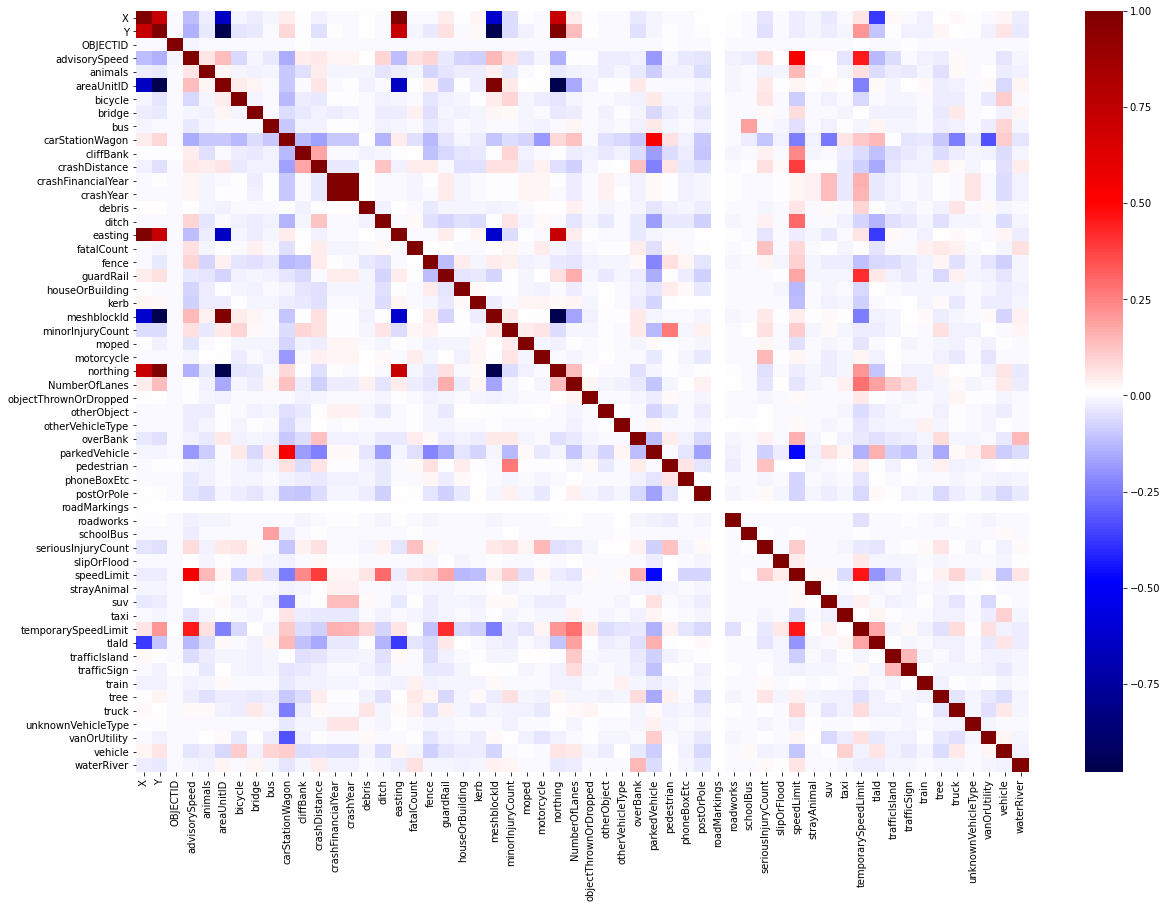

In [ ]:
plt.figure(figsize=(20,14))
sns.heatmap(dfcrash.corr(),cmap='seismic')
plt.show()

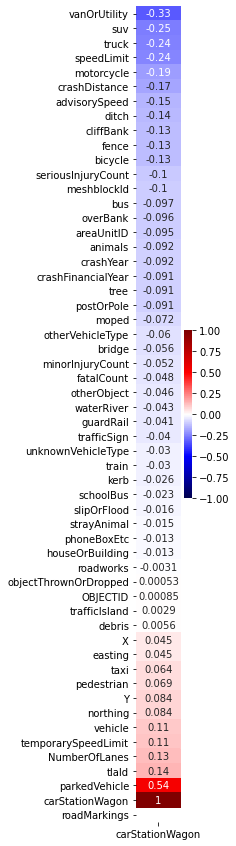

In [ ]:
corr_crash=dfcrash.corr()
corr_crash.head()
plt.figure(figsize=(1,15))
sns.heatmap(corr_crash[['carStationWagon']].sort_values(by=['carStationWagon']), cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
dfcrash['crashSeverity'].value_counts()

Non-Injury Crash    501832
Minor Crash         158452
Serious Crash        39112
Fatal Crash           6428
Name: crashSeverity, dtype: int64

In [ ]:
crash_ranks = {'Non-Injury Crash':0,'Minor Crash':1,'Serious Crash':2,'Fatal Crash':3}

dfcrash['crashSeverityNumerical']=dfcrash['crashSeverity'].map(crash_ranks)
dfcrash['crashSeverityNumerical']

0         1
1         0
2         1
3         1
4         1
         ..
705819    0
705820    1
705821    0
705822    1
705823    1
Name: crashSeverityNumerical, Length: 705824, dtype: int64

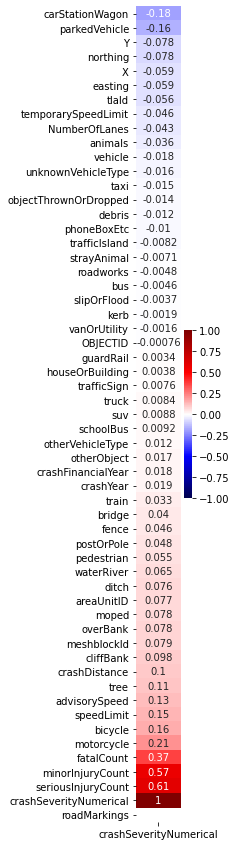

In [ ]:
corr_crash=dfcrash.corr()
corr_crash.head()
plt.figure(figsize=(1,15))
sns.heatmap(corr_crash[['crashSeverityNumerical']].sort_values(by=['crashSeverityNumerical']), cmap='seismic', vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
train, test = train_test_split(dfcrash, train_size=0.80, test_size=0.20, 
                              stratify=dfcrash['crashSeverity'], random_state=42)

In [ ]:
target='crashSeverity'
features=train.columns.drop([target,'OBJECTID','roadMarkings','minorInjuryCount','fatalCount','seriousInjuryCount','crashSeverityNumerical'])

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
baseline=(y_train.value_counts(normalize=True)[0])
print(f'The majority class baseline is: {baseline:.4%}')

The majority class baseline is: 71.0987%


Train accuracy: 89.0904%
Validation accuracy: 73.4757%


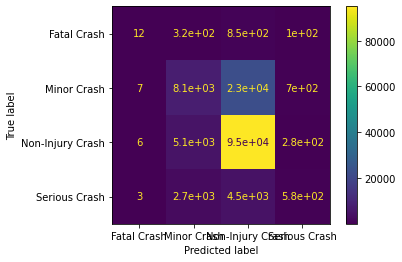

CPU times: user 59.9 s, sys: 787 ms, total: 1min
Wall time: 38.2 s


In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

pipeline.fit(X_train, y_train)

print(f'Train accuracy: {pipeline.score(X_train, y_train):.4%}')
print(f'Validation accuracy: {pipeline.score(X_test, y_test):.4%}')
plot_confusion_matrix(pipeline, X_test, y_test)
plt.show()

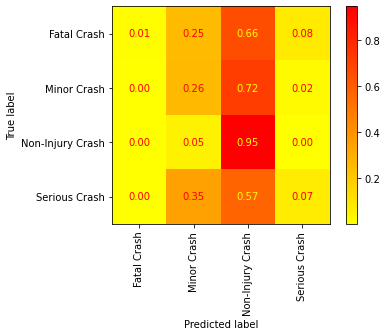

In [ ]:
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='autumn_r');

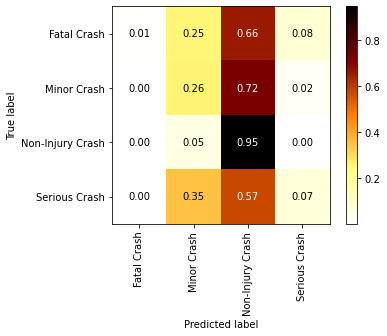

In [ ]:
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='afmhot_r');

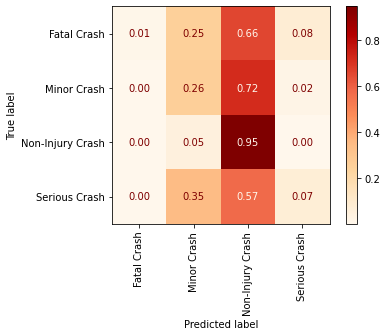

In [ ]:
plot_confusion_matrix(pipeline, X_test, y_test, 
                      xticks_rotation='vertical', 
                      normalize='true',
                      values_format='.2f',
                      cmap='OrRd');

In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    LogisticRegression()
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'MAE for {k} folds:', -scores)
print(f'{(scores[0]+scores[1]+scores[2])/3:.4%}')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

MAE for 3 folds: [-0.71098714 -0.71098714 -0.71098561]
71.0987%
CPU times: user 2min 43s, sys: 49.9 s, total: 3min 33s
Wall time: 2min 10s


In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'MAE for {k} folds:', -scores)
print(f'{(scores[0]+scores[1]+scores[2])/3:.4%}')

MAE for 3 folds: [-0.73402401 -0.73368399 -0.73267842]
73.3462%
CPU times: user 25.2 s, sys: 750 ms, total: 25.9 s
Wall time: 1min 5s


In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42, max_depth=40, min_samples_leaf=2)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'MAE for {k} folds:', -scores)
print(f'{(scores[0]+scores[1]+scores[2])/3:.4%}')

MAE for 3 folds: [-0.74440017 -0.74455956 -0.74417567]
74.4378%
CPU times: user 41.5 s, sys: 1.02 s, total: 42.5 s
Wall time: 3min 53s


In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    DecisionTreeClassifier()
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'MAE for {k} folds:', -scores)
print(f'{(scores[0]+scores[1]+scores[2])/3:.4%}')

MAE for 3 folds: [-0.61304325 -0.61423866 -0.61452882]
61.3937%
CPU times: user 1min 28s, sys: 275 ms, total: 1min 28s
Wall time: 1min 28s


In [ ]:
%%time
pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(), 
    DecisionTreeClassifier()
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='accuracy')
print(f'MAE for {k} folds:', -scores)
print(f'{(scores[0]+scores[1]+scores[2])/3:.4%}')

MAE for 3 folds: [-0.61941877 -0.6207895  -0.61900765]
61.9739%
CPU times: user 1min 24s, sys: 117 ms, total: 1min 24s
Wall time: 1min 24s
